# **China Z Index (CZI)**
**Tolga Barış Terzi – 2025**

This notebook demonstrates example calculations of the **China Z Index (CZI)**, following the methodology of **Wu et al. (2001)**.  

CZI is a **standardized precipitation-based drought index** that incorporates **skewness correction** into the Z-score, making it more suitable for **non-normally distributed precipitation data**. A modified version (MCZI) can be calculated by replacing the mean with the **median** in the Z-score computation.  

---

## **CZI Methodology Overview**

1. **Aggregation**: Accumulate precipitation over the selected time scale (e.g., 1, 3, 6, 12 months).  
2. **Standardization**: For each calendar month, calculate:  

   - **Z-score**:  
     $$
     Z = \frac{P - \overline{P}}{s}
     $$  
     where $P$ is precipitation, $\overline{P}$ is the mean precipitation, and $s$ is the standard deviation.  

   - **Skewness ($C_s$)**:  
     $$
     C_s = \frac{\sum (P - \overline{P})^3}{n \, s^3}
     $$  

   - **CZI formula**:  
     $$
     \text{CZI} = \frac{6}{C_s} \left[ \left(\frac{C_s}{2} Z + 1\right)^{1/3} \right] - \frac{6}{C_s} + \frac{C_s}{6}
     $$  

3. **Interpretation**:  
   - Negative values → **Drought conditions**  
   - Positive values → **Wet conditions**  

---

## **Required Packages**


In [ ]:
import pandas as pd
import numpy as np
import pydrght

---
## **Load the Data**

The example dataset contains monthly values of:
  
- **Precipitation** 

The data is from the **Seyhan River Basin, Turkey**, covering the period **October 1964 – September 2011**, which corresponds to hydrological years **1965–2011**.

In [9]:
df = pd.read_csv("data.csv", index_col=0, parse_dates=True)
display(df.head())

,STREAMFLOW,PRECIPITATION,MINT,MAXT,MEANT,PET
DATE,,,,,,
1964-10-01,10.5,46.67,2.0,22.7,12.0,95.471
1964-11-01,11.0,99.70,-1.7,12.3,5.0,43.318
1964-12-01,12.5,64.70,-4.1,4.1,-0.4,22.320
1965-01-01,12.3,41.00,-5.0,3.0,-1.4,22.607
1965-02-01,15.8,104.50,-6.9,3.4,-2.1,29.121


---
## **Calculate CZI**

In this example, we calculate monthly **CZI** values using precipitation data.  

- **Precipitation** is selected from the dataset.  

We use the `pydrght.CZI` class to calculate:  

1. **CZI**: The China Z Index, which standardizes precipitation using mean and standard deviation, while correcting for skewness.  
2. **MCZI (optional)**: A modified version of CZI, computed by using the **median** instead of the mean, to reduce sensitivity to outliers and skewed distributions.  


=== China Z Index (CZI) ===


DATE
1965-09-01   -0.214723
1965-10-01   -0.073664
1965-11-01   -0.445689
1965-12-01    0.323689
1966-01-01    1.570276
Name: CZI-12, dtype: float64

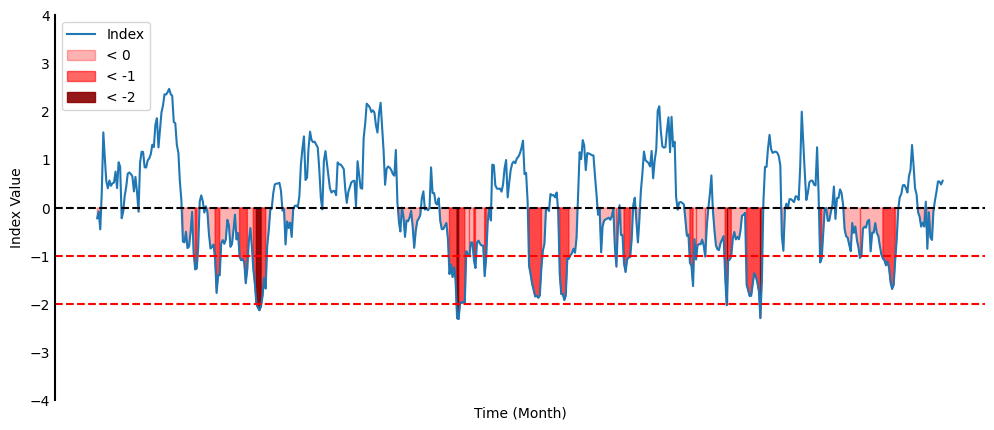

In [10]:
# Select precipitation column
precip = df['PRECIPITATION']

# Initialize CZI class
czi = pydrght.CZI(precip=precip, ts=12)

# === China Z Index (CZI) ===
CZI_values = czi.calculate()
print("=== China Z Index (CZI) ===")
display(CZI_values.head())

pydrght.utils.plot_index_with_severity(CZI_values)

---

## **References**

- Wu, H., Hayes, M. J., Weiss, A., & Hu, Q. (2001).   "An evaluation of the Standardized Precipitation Index, the China-Z Index and the statistical Z-Score." *International Journal of Climatology*, 21(6), 745–758.
